In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_athens_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('athens')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/athens_{date}.csv',index=False)
get_listings_athens_timeseries()

In [3]:
# pull in detailed_listings
raw_df_athens = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_athens)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(athens_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 9582 AirBnb listings.


In [4]:
athens_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2020-12.csv')
athens_raw_df_12_12_2020.shape





(9413, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for athens
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_athens = glob.glob('athens/**.csv')
files_athens

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['athens/Athens_2020-12.csv',
 'athens/Athens_2021-08.csv',
 'athens/Athens_2021-09.csv',
 'athens/Athens_2021-02.csv',
 'athens/Athens_2021-03.csv',
 'athens/Athens_2021-01.csv',
 'athens/Athens_2021-10.csv',
 'athens/Athens_2021-04.csv',
 'athens/Athens_2021-07.csv',
 'athens/Athens_2021-06.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

athens_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(athens_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(athens_raw_df_12_12_2020['price'].mean(),2)}.")

athens_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(athens_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_1_9_2021['price'].mean(),2)}.")

athens_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(athens_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_2_8_2021['price'].mean(),2)}.")

athens_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(athens_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_3_4_2021['price'].mean(),2)}.")

athens_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(athens_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_4_9_2021['price'].mean(),2)}.")

#athens_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(athens_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_5_19_2021['price'].mean(),2)}.")

athens_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(athens_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_6_3_2021['price'].mean(),2)}.")

athens_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(athens_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_7_4_2021['price'].mean(),2)}.")

athens_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(athens_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_8_6_2021['price'].mean(),2)}.")

athens_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(athens_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_9_7_2021['price'].mean(),2)}.")

athens_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(athens_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_10_6_2021['price'].mean(),2)}.")

#athens_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(athens_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 9413 AirBnb listings; the avg price is €68.86.
The 1_9_2021 dataset contains 9482 AirBnb listings; the avg price is €74.33.
The 2_8_2021 dataset contains 9467 AirBnb listings; the avg price is €73.43.
The 3_4_2021 dataset contains 9510 AirBnb listings; the avg price is €74.94.
The 4_9_2021 dataset contains 9618 AirBnb listings; the avg price is €81.68.
The 6_3_2021 dataset contains 9584 AirBnb listings; the avg price is €86.28.
The 7_4_2021 dataset contains 9640 AirBnb listings; the avg price is €90.54.
The 8_6_2021 dataset contains 9773 AirBnb listings; the avg price is €84.23.
The 9_7_2021 dataset contains 9766 AirBnb listings; the avg price is €83.34.
The 10_6_2021 dataset contains 9582 AirBnb listings; the avg price is €83.44.


In [7]:
df_list_athens = [athens_raw_df_12_12_2020, athens_raw_df_1_9_2021, athens_raw_df_2_8_2021,
           athens_raw_df_3_4_2021, athens_raw_df_4_9_2021,  athens_raw_df_6_3_2021, athens_raw_df_7_4_2021,
           athens_raw_df_8_6_2021, athens_raw_df_9_7_2021, athens_raw_df_10_6_2021]

dates_athens = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_athens = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_athens = []

def airbnb_parse_athens(df_list, files):
    for file in files_athens:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_{file}.csv")
        print(f"The {file} athens dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_athens(df_list, dates):
    for file in files_athens:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_{file}.csv")
        #print(f"The {date} athens dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_athens.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_athens)

athens_parse = airbnb_parse_athens(df_list_athens, files_athens)


The 2020-12 athens dataset contains 9413 AirBnb listings -- the avg price is €68.86.
The 2021-01 athens dataset contains 9482 AirBnb listings -- the avg price is €74.33.
The 2021-02 athens dataset contains 9467 AirBnb listings -- the avg price is €73.43.
The 2021-03 athens dataset contains 9510 AirBnb listings -- the avg price is €74.94.
The 2021-04 athens dataset contains 9618 AirBnb listings -- the avg price is €81.68.
The 2021-06 athens dataset contains 9584 AirBnb listings -- the avg price is €86.28.
The 2021-07 athens dataset contains 9640 AirBnb listings -- the avg price is €90.54.
The 2021-08 athens dataset contains 9773 AirBnb listings -- the avg price is €84.23.
The 2021-09 athens dataset contains 9766 AirBnb listings -- the avg price is €83.34.
The 2021-10 athens dataset contains 9582 AirBnb listings -- the avg price is €83.44.


In [8]:
athens_summary = airbnb_to_frame_athens(df_list_athens, files_athens)
athens_summary['Date of scrape'] = pd.to_datetime(athens_summary['Date of scrape'])
athens_summary['City'] = 'athens'
athens_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,9413,68.86,45.0,7,8000,1.52,athens
1,2021-01-01,9482,74.33,43.0,0,8000,1.45,athens
2,2021-02-01,9467,73.43,43.0,7,8000,1.42,athens
3,2021-03-01,9510,74.94,45.0,6,8000,1.39,athens
4,2021-04-01,9618,81.68,45.0,6,8000,1.36,athens
5,2021-06-01,9584,86.28,50.0,9,8000,1.51,athens
6,2021-07-01,9640,90.54,50.0,8,8000,1.58,athens
7,2021-08-01,9773,84.23,51.0,9,8000,1.78,athens
8,2021-09-01,9766,83.34,50.0,9,8000,1.85,athens
9,2021-10-01,9582,83.44,50.0,9,8000,1.86,athens


In [9]:
athens_summary_listings = athens_summary[['Date of scrape','# of Listings']]
athens_summary_listings.set_index('Date of scrape', inplace=True)


athens_summary_prices_avg = athens_summary[['Date of scrape', 'Avg Price']]
athens_summary_prices_avg.set_index('Date of scrape', inplace=True)

athens_summary_prices_median = athens_summary[['Date of scrape', 'Median Price']]
athens_summary_prices_median.set_index('Date of scrape', inplace=True)

athens_summary_reviews_permonth = athens_summary[['Date of scrape', 'Avg reviews per month']]
athens_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

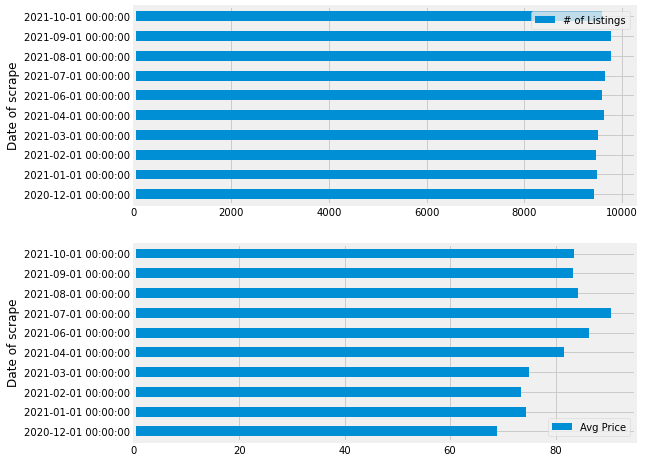

In [10]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

athens_summary_listings.plot(ax=ax1, kind='barh')
athens_summary_prices_avg.plot(ax=ax2, kind='barh')

In [11]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:xlabel='Date of scrape'>

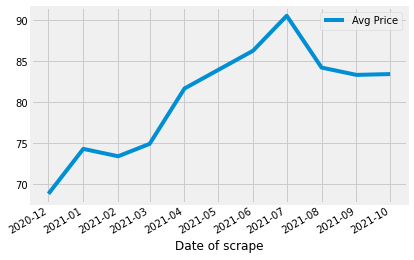

In [12]:
athens_summary.plot(x='Date of scrape', y='Avg Price')

In [13]:
master_df_athens = pd.concat(df_list_athens)
master_df_athens = master_df_athens[master_df_athens['room_type']=='Entire home/apt']
master_df_athens_unique = master_df_athens.drop_duplicates(subset='id')
#master_df_athens_unique = master_df_athens[master_df_athens_unique['room_type']=='Entire home/apt']
master_df_athens_unique['room_type'].value_counts()

Entire home/apt    10611
Name: room_type, dtype: int64

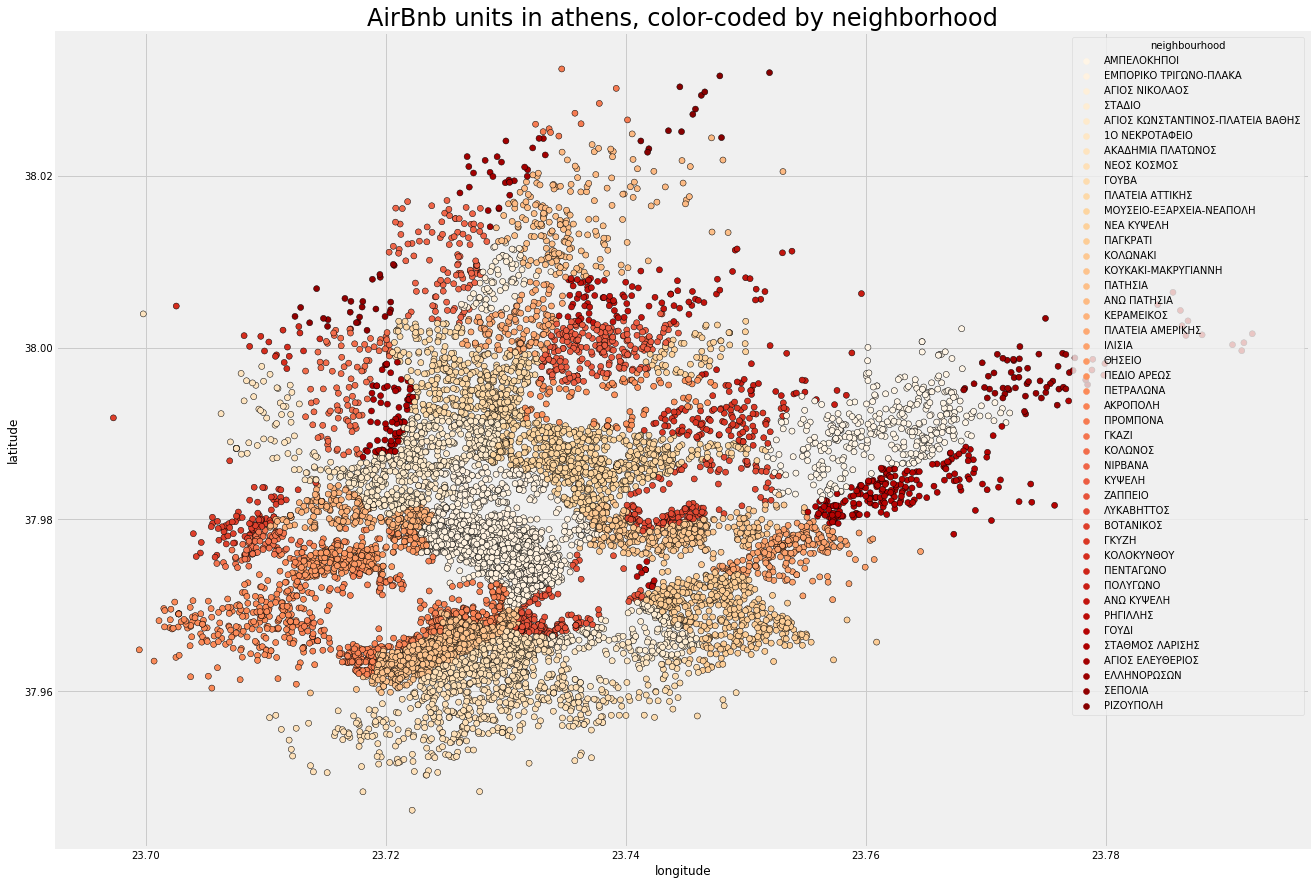

In [14]:
title = 'AirBnb units in athens, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_athens_unique.longitude, master_df_athens_unique.latitude, hue = master_df_athens_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_athens.png')
plt.show()

## Add review data through a join

In [15]:
df_reviews = pd.concat([athens_raw_df_10_6_2021,raw_df_athens],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
df_reviews_.shape

(8463, 75)

## Regression

In [16]:
#df_reviews_.columns

In [17]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [18]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -50.61586846580005
Coefficients:  [  8.61649017  17.33543055  -2.54481358  -0.05692243   4.01787588
  -5.37255336  16.07718689  19.07276906 -17.27444328]
LinearRegression()


In [19]:
y_pred2 = regr.predict(X_)

In [20]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(4316, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

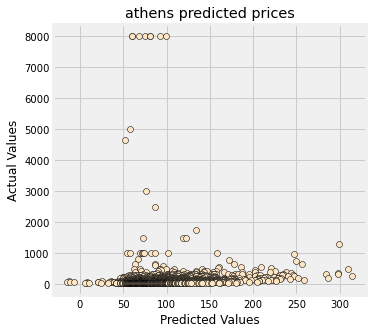

In [21]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('athens predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [22]:
df_result.index

Int64Index([6236, 4329, 2320, 6238, 6239, 6243, 3753, 5263, 1783, 1645,
            ...
            9568, 3912, 2556, 9571, 1838, 9580, 9579, 7605, 7507, 5772],
           dtype='int64', length=4316)

In [23]:
raw_df_athens.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...","Athens Furnished Apartment No6 is 3-bedroom apartment with 2-bathrooms<br />-excellent located <br />-close to metro station, <br />-lovely, <br />-very clean <br />with all the facilities that you will need, nice balcony, excellent Wi-Fi, cable tv, fully air conditioned…<br /><br /><b>The space</b><br />Athens Furnished Apartment No6 is an excellent located, close to metro, lovely, very clean 3-bedroom apartment with 2-bathrooms with all the facilities that you will need and balcony. It is on the 2nd floor but do not worry because there is elevator in the building. Fully equipped kitchen with everything you need to prepare your lunch/dinner. Living room to relax and enjoy a movie or a sport event. 2 Clean nice bathrooms. For more than 6 people there is a sofa/bed. <br />Apartment No6 has everything you will need.<br />1st Bedroom – Double bed<br />2nd Bedroom – 2 single beds<br />3rd Bedroom – 2 single beds<br />-Telephone line for incoming calls or to call us if you need something.<b","Ampelokipi district is nice multinational and safe area with excellent transportation system. Staying in Ampelokipi area you have the safety you need when you are in a foreign country. Everything you need for your vacations you can find it next to the apartment: Shops, Supermarkets, Restaurants, Bars, Coffee shops, Bakeries, Groceries, 24 hours kiosk, Pharmacies, Hair Salon, Banks, Travel Agents, Cinemas, summer cinemas and many more... <br />Also every Saturday there is a Farmers market 2-3 minutes away from the apartment.<br /><br />Athens Classical Marathon route pass from the area.<br />In the area you will also find Athens Concert Hall (Megaron Mousikis), National Sculpture Gallery, Badminton Theater (international shows), the biggest urban park in Athens, ministries, universities, embassies, hospitals and more…",https://a0.muscache.com/pictures/f7e19a44-5afe-4558-8b5d-2f8186723721.jpg,37177,https://www.airbnb.com/users/show/37177,...,4.84,4.50,4.66,00000957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,"Athens Quality Apartments - Deluxe apartment is 1-bedroom apartment (50 square meters) <br />-excellent located <br />-close to metro station, <br />-lovely, <br />-very clean <br />with all the facilities that you will need, nice balcony, excellent Wi-Fi, cable tv, fully air conditioned…<br /><br /><b>The space</b><br />Athens Furnished Apartment No3 is an excellent located, close to metro, lovely, very clean 1-bedroom apartment (50 square meters) with all the facilities that you will need and a very nice balcony facing the inner garden to enjoy your breakfast in the morning or relax in the evening. Fully equipped kitchen with everything you need to prepare your lunch/dinner. Nice Living room to relax and enjoy a movie or a sport event. Clean nice bathroom. For more than 2 people there is a great double sofa/bed in the living room.<br />Apartment No3 has everything you will need.<br />-Telephone line for incoming calls or to call us if you need something.<br />-Free fast Wi-Fi from th","Ampelokipi district is nice multinational and safe area with excellent transportation system. Staying in Ampelokipi area you have the safety you need when you are in a foreign country. Everything you need for your vacations you can find it next to the apartment: Shops, Supermarkets, Restaurants, Bars, Coffee shops, Bakeries, Groceries, 24 hours kiosk, Pharmacies, Hair Salon, Banks, T

In [24]:
df_result['id'] = df_result.index.values
df_result.shape

(4316, 4)

In [25]:
raw_df_athens.index.values
df_result.index.values

array([6236, 4329, 2320, ..., 7605, 7507, 5772])

In [26]:
df_result_merge = df_result.merge(raw_df_athens, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(9582, 77)

In [27]:
df_join = df_result.join(raw_df_athens, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                            0
Predicted                                         0
Diff                                              0
id_x                                              0
id_y                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               803
Length: 78, dtype: int64

In [28]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [29]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_athens = df_print[df_print['Predicted']>0]
df_print_athens.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
6236,6236,8000,"$8,000.00",59.899473,-7940.100527,https://www.airbnb.com/rooms/38310147,37.96477,23.73299,2,ΝΕΟΣ ΚΟΣΜΟΣ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4329,4329,8000,"$8,000.00",59.899473,-7940.100527,https://www.airbnb.com/rooms/30817180,37.99130,23.75298,2,ΑΜΠΕΛΟΚΗΠΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2320,2320,8000,"$8,000.00",68.515963,-7931.484037,https://www.airbnb.com/rooms/22114906,38.01844,23.73003,3,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6238,6238,8000,"$8,000.00",74.587640,-7925.412360,https://www.airbnb.com/rooms/38313503,37.96650,23.73124,4,ΝΕΟΣ ΚΟΣΜΟΣ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6239,6239,8000,"$8,000.00",80.659316,-7919.340684,https://www.airbnb.com/rooms/38315399,37.96478,23.73316,5,ΝΕΟΣ ΚΟΣΜΟΣ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
df_print_athens['neighbourhood_cleansed'].value_counts()

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1019
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  488
ΝΕΟΣ ΚΟΣΜΟΣ                          283
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             268
ΑΚΡΟΠΟΛΗ                             227
ΚΟΛΩΝΑΚΙ                             217
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     211
ΘΗΣΕΙΟ                               162
ΠΑΓΚΡΑΤΙ                             153
ΚΕΡΑΜΕΙΚΟΣ                           131
ΑΜΠΕΛΟΚΗΠΟΙ                          126
ΣΤΑΔΙΟ                               118
ΖΑΠΠΕΙΟ                               97
ΙΛΙΣΙΑ                                90
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                       85
ΛΥΚΑΒΗΤΤΟΣ                            67
ΓΟΥΔΙ                                 64
ΠΕΤΡΑΛΩΝΑ                             62
ΚΥΨΕΛΗ                                61
ΓΚΑΖΙ                                 36
ΠΑΤΗΣΙΑ                               33
ΒΟΤΑΝΙΚΟΣ                             29
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                      28
ΠΕΔΙΟ ΑΡΕΩΣ                           22
ΓΚΥΖΗ           

In [31]:
df_print_athens_final = df_print_athens.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_athens_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [32]:
df_athens_query = df_print_athens_final.query('number_of_reviews >11 & accommodates <=6')
df_athens_query.shape
#df_athens_query.head()

(1824, 18)

In [33]:
df_athens_query_filter = df_athens_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_athens_query_filter.shape


(1063, 18)

In [34]:
df_athens_query_filter.shape

(1063, 18)

In [35]:
df_neighborhood_plot = df_print_athens_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,1043.000000
9,ΒΟΤΑΝΙΚΟΣ,287.400000
26,ΝΕΑ ΚΥΨΕΛΗ,237.500000
16,ΖΑΠΠΕΙΟ,206.905882
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,172.333333
12,ΓΟΥΒΑ,119.769231
19,ΚΕΡΑΜΕΙΚΟΣ,115.453782
5,ΑΚΡΟΠΟΛΗ,115.446701
17,ΘΗΣΕΙΟ,113.957447
25,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,110.758140


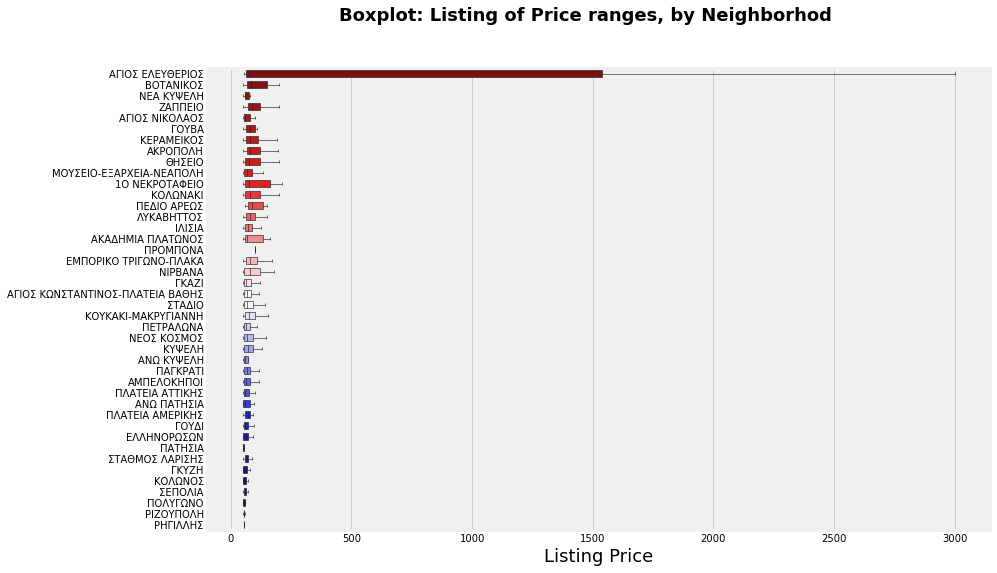

In [64]:
df_neighborhood_plot = df_print_athens_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,5))
dft = df_print_athens_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

fig.savefig('athens_neighborhood_boxplot.png')

In [37]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [38]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_athens)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 9582 files in the dataset
There is 5457 to be regressed with accommodates <=4


In [39]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  -13.177590632832164
Coefficients:  [ 7.05466535e+00  1.62042429e+01 -8.20308641e+00 -1.08080969e-02
  3.33936328e+00 -3.33390036e+00  1.02511683e+01  1.11695530e+01
 -9.82128434e+00]
LinearRegression()


In [40]:
y_pred2_4 = regr4.predict(X_4)

In [41]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(2591, 3)

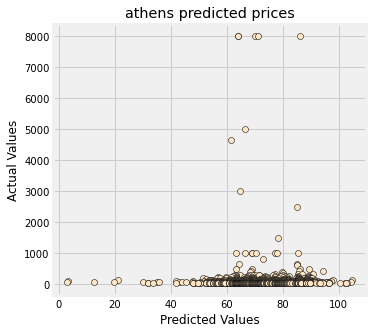

In [42]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('athens predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 2 or less

In [43]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_athens)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 9582 files in the dataset
There is 1613 to be regressed with accommodates <=2


In [44]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  -10.909665182211242
Coefficients:  [ 26.29018005   7.04354361 -10.7936697   -0.12168564   4.50399158
  -6.8986044   12.85025909  11.37064766 -14.82926944]
LinearRegression()


In [45]:
y_pred2_2 = regr2.predict(X_2)

In [46]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(575, 3)

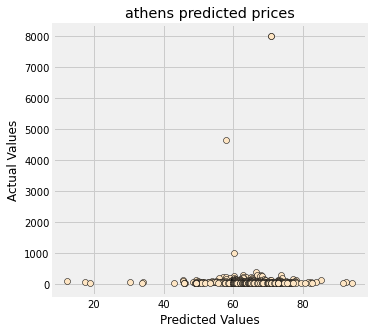

In [47]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('athens predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 6 or less

In [48]:
## Regression fucntion, rooms for 2 or less

In [49]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=6]
print(f'There is {len(raw_df_athens)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 9582 files in the dataset
There is 7111 to be regressed with accommodates <=6


In [50]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  -24.906678398670422
Coefficients:  [  7.49200606   7.24845971  -1.13784078  -0.07889591   2.94007006
  -4.40896915  12.4274913   17.38543278 -13.72417586]
LinearRegression()


In [51]:
y_pred6_6 = regr6.predict(X_6)

In [52]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(3803, 3)

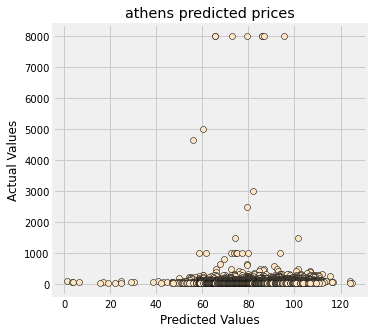

In [53]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('athens predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [54]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_athens)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 9582 files in the dataset
There is 7676 to be regressed


In [55]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  -50.61586846580005
Coefficients:  [  8.61649017  17.33543055  -2.54481358  -0.05692243   4.01787588
  -5.37255336  16.07718689  19.07276906 -17.27444328]
LinearRegression()


In [56]:
y_predall_all = regrall.predict(X_all)

In [57]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(4316, 3)

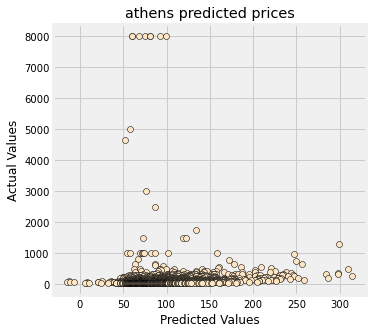

In [58]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('athens predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [59]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
0,10595,Entire rental unit,Entire home/apt,8,3.0,5.0,79,79,4.77,4.81,4.75,4.50,4.66
1,10990,Entire rental unit,Entire home/apt,4,1.0,1.0,50,86,4.86,4.94,4.90,4.82,4.82
3,10995,Entire rental unit,Entire home/apt,4,1.0,2.0,48,82,4.79,4.95,4.91,4.77,4.77
4,27262,Entire rental unit,Entire home/apt,4,1.0,1.0,47,57,4.76,4.81,4.94,4.69,4.63
5,28186,Entire loft,Entire home/apt,4,1.0,2.0,59,82,4.82,4.86,4.89,4.94,4.78


In [60]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)


Intercept:  -50.61586846580005
Coefficients:  [  8.61649017  17.33543055  -2.54481358  -0.05692243   4.01787588
  -5.37255336  16.07718689  19.07276906 -17.27444328]
Intercept:  -10.909665182211242
Coefficients:  [ 26.29018005   7.04354361 -10.7936697   -0.12168564   4.50399158
  -6.8986044   12.85025909  11.37064766 -14.82926944]
Intercept:  -13.177590632832164
Coefficients:  [ 7.05466535e+00  1.62042429e+01 -8.20308641e+00 -1.08080969e-02
  3.33936328e+00 -3.33390036e+00  1.02511683e+01  1.11695530e+01
 -9.82128434e+00]
Intercept:  -24.906678398670422
Coefficients:  [  7.49200606   7.24845971  -1.13784078  -0.07889591   2.94007006
  -4.40896915  12.4274913   17.38543278 -13.72417586]


In [61]:
df_athens_query_filter.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
7364,7364,85,$85.00,108.760513,23.760513,https://www.airbnb.com/rooms/43577048,37.986620,23.735380,4,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,4.72,4.61,4.78,4.56,4.44,4.83,4.78,18
1063,1063,60,$60.00,104.943167,44.943167,https://www.airbnb.com/rooms/14132118,37.967888,23.730019,4,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,4.82,4.79,4.89,4.88,4.82,4.93,4.78,61
5756,5756,93,$93.00,100.699602,7.699602,https://www.airbnb.com/rooms/36252670,37.962140,23.720300,4,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,5.00,5.00,5.00,5.00,5.00,5.00,4.73,16
3702,3702,76,$76.00,98.488722,22.488722,https://www.airbnb.com/rooms/28269479,37.967330,23.702300,4,ΠΕΤΡΑΛΩΝΑ,4.88,4.82,4.76,4.82,5.00,4.53,4.71,19
257,257,155,$155.00,97.374166,-57.625834,https://www.airbnb.com/rooms/3704577,37.969100,23.728420,4,ΑΚΡΟΠΟΛΗ,4.91,4.96,4.91,4.97,4.96,4.99,4.87,137


## Find the highest predicted in athens - <= 4

In [62]:
df_athens_query_filter['% Diff'] = (df_athens_query_filter['Actual']/df_athens_query_filter['Predicted']-1)* 100
df_athens_query_filter.rename(columns={'id_x':'id',
                                     'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_athens_query_final = df_athens_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy','cleanliness',
                                            'location','value','neighborhood','listing_url','accommodates','number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_athens_query_final)} listings that meet criteria')
df_athens_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head()


Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 1063 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
7364,85,108.76,-21.85,4.72,4.61,4.78,4.83,4.78,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,https://www.airbnb.com/rooms/43577048,4,18
1063,60,104.94,-42.83,4.82,4.79,4.89,4.93,4.78,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,https://www.airbnb.com/rooms/14132118,4,61
5756,93,100.70,-7.65,5.00,5.00,5.00,5.00,4.73,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,https://www.airbnb.com/rooms/36252670,4,16
3702,76,98.49,-22.83,4.88,4.82,4.76,4.53,4.71,ΠΕΤΡΑΛΩΝΑ,https://www.airbnb.com/rooms/28269479,4,19
257,155,97.37,59.18,4.91,4.96,4.91,4.99,4.87,ΑΚΡΟΠΟΛΗ,https://www.airbnb.com/rooms/3704577,4,137


## Find the best deal in athens - <=4

In [63]:
df_athens_deal = df_athens_query_final[df_athens_query_final['Price']<300].sort_values(by=['% Diff'], 
                                ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2})
df_athens_deal.head(7)




,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
610,50,95.06,-47.40,4.88,4.93,4.90,4.93,4.88,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,https://www.airbnb.com/rooms/9656826,4,289
2930,51,93.72,-45.58,4.80,4.82,4.79,4.92,4.86,ΑΚΡΟΠΟΛΗ,https://www.airbnb.com/rooms/24951180,4,119
934,50,90.13,-44.52,4.86,4.87,4.96,4.73,4.84,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,https://www.airbnb.com/rooms/13393943,4,72
384,53,95.42,-44.46,4.91,4.86,4.86,4.83,4.74,ΠΑΓΚΡΑΤΙ,https://www.airbnb.com/rooms/6049558,4,24
5586,50,88.80,-43.69,4.93,4.93,4.97,4.76,4.76,ΑΜΠΕΛΟΚΗΠΟΙ,https://www.airbnb.com/rooms/35544516,4,29
421,50,88.49,-43.50,4.84,4.86,4.91,4.92,4.85,ΙΛΙΣΙΑ,https://www.airbnb.com/rooms/6496940,4,87
1709,51,90.18,-43.45,4.88,4.92,4.92,4.97,4.86,ΖΑΠΠΕΙΟ,https://www.airbnb.com/rooms/18929605,4,220
